# Study of COVID-19 in INDIA
Run all the cells once daily to update covid.csv

### Importing modules

In [60]:
## Run this section

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing from Ministry of Health

In [76]:
## Start running

latest = pd.read_html("https://www.mohfw.gov.in/")[9]
latest = latest.drop(['S. No.'], axis=1)
latest

,Name of State / UT,Total Confirmed cases *,Cured/Discharged/Migrated,Death
0,Andhra Pradesh,23,1,0
1,Andaman and Nicobar Islands,9,0,0
2,Bihar,15,0,1
3,Chandigarh,8,0,0
4,Chhattisgarh,7,0,0
5,Delhi,87,6,2
6,Goa,5,0,0
7,Gujarat,69,1,6
8,Haryana,36,18,0
9,Himachal Pradesh,3,0,1


In [77]:
latest.columns = ['State/UnionTerritory', 'Total_cases', 'Cured', 'Deaths']

In [78]:
# latest['Date'] = str(datetime.date.today() - datetime.timedelta(days = 1))
latest['Date'] = str(datetime.date.today())

In [79]:
latest = latest[:-2]

In [80]:
latest

,State/UnionTerritory,Total_cases,Cured,Deaths,Date
0,Andhra Pradesh,23,1,0,2020-03-30
1,Andaman and Nicobar Islands,9,0,0,2020-03-30
2,Bihar,15,0,1,2020-03-30
3,Chandigarh,8,0,0,2020-03-30
4,Chhattisgarh,7,0,0,2020-03-30
5,Delhi,87,6,2,2020-03-30
6,Goa,5,0,0,2020-03-30
7,Gujarat,69,1,6,2020-03-30
8,Haryana,36,18,0,2020-03-30
9,Himachal Pradesh,3,0,1,2020-03-30


### Merging latest data and previous data

In [81]:
old_covid = pd.read_csv("new_covid.csv")

In [82]:
# old_covid['Total_cases'] = old_covid['Indian']+old_covid['Foreigner']
# old_covid = old_covid.drop(['Indian','Foreigner'],axis=1)
# old_covid.to_csv("new_covid.csv", index=False)

In [83]:
## Deleting today's record to avoid overwriting
# old_covid = old_covid[old_covid['Date'] != str(datetime.date.today() - datetime.timedelta(days = 1))]

old_covid = old_covid[old_covid['Date'] != str(datetime.date.today())]

In [84]:
## Merge
covid = pd.concat([old_covid, latest], ignore_index=True)

## Updating covid database
covid.to_csv("new_covid.csv", index=False)

## Work with updated covid DF.

In [85]:
# Converting to datetime
covid['Date'] = pd.to_datetime(covid['Date'])

### Formatting Beds

Call **beds.csv** as *beds* 

In [86]:
## Start running
beds = pd.read_csv('beds.csv')
beds.head()

,State/UnionTerritory,PrimaryHealthCenters,CommunityHealthCenters,SubDistrictHospitals,DistrictHospitals,TotalPublicHealthFacilities,NumPublicBeds,RuralHospitals,NumRuralBeds,UrbanHospitals,NumUrbanBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,0,15,199,2320,208,2136,10,268
3,Assam,1007,166,14,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936


### Census Formatting

Call **census.csv** as census

In [87]:
# Run this
census = pd.read_csv("census.csv")
census.head()

,State/UnionTerritory,Population,Rural,Urban,Area-sqkm,Density-/sqkm,SexRatio
0,Uttar Pradesh,199812341,155317278,44495063,240928,828.0,912
1,Maharashtra,112374333,61556074,50818259,307713,365.0,929
2,Bihar,104099452,92341436,11758016,94163,1102.0,918
3,West Bengal,91276115,62183113,29093002,88752,1029.0,953
4,Madhya Pradesh,72626809,52557404,20069405,308245,236.0,931


=====================================================================================

## Study of COVID 19 IN

In [88]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Cured                 500 non-null    object        
 1   Date                  500 non-null    datetime64[ns]
 2   Deaths                500 non-null    object        
 3   State/UnionTerritory  500 non-null    object        
 4   Total_cases           500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 19.7+ KB


In [89]:
import re
def intconvert(x):
    '''
    Integer & Special charecter remover
    '''
    return int(re.findall(r'\d+',x)[0])

In [90]:
# covid['Foreigner'] = covid['Foreigner'].apply(int)
covid['Total_cases'] = covid['Total_cases'].apply(int)
#implementing lambda
covid['Deaths'] = covid['Deaths'].apply(int)
covid['Cured'] = covid['Cured'].apply(int)

In [91]:
covid['Total Active'] = covid['Total_cases'] - covid['Cured'] - covid['Deaths']

In [92]:
india = covid.groupby('Date').sum()
india

,Cured,Deaths,Total_cases,Total Active
Date,,,,
2020-01-30,0,0,1,1
2020-01-31,0,0,1,1
2020-02-01,0,0,2,2
2020-02-02,0,0,3,3
2020-02-03,0,0,3,3
...,...,...,...,...
2020-03-26,45,15,694,634
2020-03-27,67,17,724,640
2020-03-28,80,19,909,810


In [93]:

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

# import chart_studio.plotly as py
# import plotly.graph_objects as go

In [94]:
from plotly import __version__
print(__version__)

3.10.0


### EDA India

In [95]:
india['Total_cases'].iplot(
    title='CUMULATIVE COUNT',
    colors={'Total_cases':'black'}, width=2.5,
    xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [96]:
india[['Total Active','Cured','Deaths']].iplot(title='[ACTIVE CASES]\nHOSPITALIZED vs CURED vs DEATH',
                                      colors={'Total Active':'blue','Cured':'green','Deaths':'red'}, width=2.5
                                              ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

**80% of the affected people will be safe** if heathcare system doesn't breakdown

In [97]:
india['Safe-Zone'] = india['Total_cases']*0.8

In [98]:
india[['Total_cases','Safe-Zone','Cured']].iplot(title='CUMULATIVE COUNT',
                    colors={'Total_cases':'black', 'Safe-Zone':'blue', 'Cured':'green'}, width=2.5,
                    xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

In [99]:
init = 0
ls = []
for x in india['Total_cases']:
    ls.append(x-init)
    init=x
print(ls)
india['Rise'] = ls

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 22, 2, 1, 3, 5, 7, 12, 2, 14, 7, 3, 26, 4, 23, 14, 22, 50, 60, 77, 73, 86, 87, 88, 30, 185, 115, 181]


In [100]:
india['Rise'].iplot(kind='bar', sharing='public', title='DAILY RISE IN CASES', colors={'Rise':'indigo'}, width=2.5
                    ,xTitle='30th Jan 2020 -> today', yTitle='Confirmed cases')

#### Statewise statistics

In [101]:
states = latest.copy()
states.drop(['Date'], axis=1, inplace=True)
#states['Foreigner']=states['Foreigner'].apply(int)
states['Deaths']=states['Deaths'].apply(int)
states['Cured']=states['Cured'].apply(int)
#states['Indian']=states['Indian'].apply(int)
states['Total_cases'] = states['Total_cases'].apply(int)
states.set_index('State/UnionTerritory', inplace=True)
states

,Total_cases,Cured,Deaths
State/UnionTerritory,,,
Andhra Pradesh,23,1,0
Andaman and Nicobar Islands,9,0,0
Bihar,15,0,1
Chandigarh,8,0,0
Chhattisgarh,7,0,0
Delhi,87,6,2
Goa,5,0,0
Gujarat,69,1,6
Haryana,36,18,0


In [102]:
states.iplot(title='STATEWISE BREAKDOWN', kind='bar',orientation='h', 
    colors={'Total_cases':'blue', 'Cured':'green', 'Deaths':'red'})

#### Working on map of India

In [103]:
# Because we're making some modifications according to geopandas
map_state = states.copy()
map_state.index

Index(['Andhra Pradesh', 'Andaman and Nicobar Islands', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Karnataka', 'Kerala',
       'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Mizoram',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu',
       'Telengana', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype='object', name='State/UnionTerritory')

In [104]:
map_state.index = ['Andhra Pradesh', 'Andaman and Nicobar Islands','Bihar', 'Chandigarh','Chhattisgarh', 
                   'NCT of Delhi','Goa', 'Gujarat','Haryana', 'Himachal Pradesh','Jammu & Kashmir',
                   'Karnataka', 'Kerala','Ladakh' ,'Madhya Pradesh','Maharashtra','Manipur','Mizoram', 
                   'Odisha', 'Puducherry', 'Punjab', 'Rajasthan','Tamil Nadu', 'Telangana', 'Uttarakhand',
                    'Uttar Pradesh', 'West Bengal']

In [105]:
## Merging Ladakh with J&K
map_state.loc['Jammu & Kashmir'] = map_state.loc['Jammu & Kashmir']+map_state.loc['Ladakh']

In [106]:
import geopandas as gpd
import descartes

In [107]:
fp = "Igismap/Indian_States.shp"  #Download this file available on the internet.
map_df = gpd.read_file(fp)

In [108]:
map_df=map_df.set_index('st_nm')
map_df.index # To tally the names

Index(['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadara & Nagar Havelli', 'Daman & Diu',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'NCT of Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Odisha', 'Andhra Pradesh'],
      dtype='object', name='st_nm')

In [109]:
merged = map_df.join(map_state, on='st_nm') #with index as statename
merged['Total_cases'].fillna(0, inplace=True)
merged

,geometry,Total_cases,Cured,Deaths
st_nm,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0,NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.0,NaN,NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",0.0,NaN,NaN
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",15.0,0.0,1.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",8.0,0.0,0.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",7.0,0.0,0.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",0.0,NaN,NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.0,NaN,NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",5.0,0.0,0.0


C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less

C:\Users\Subham\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



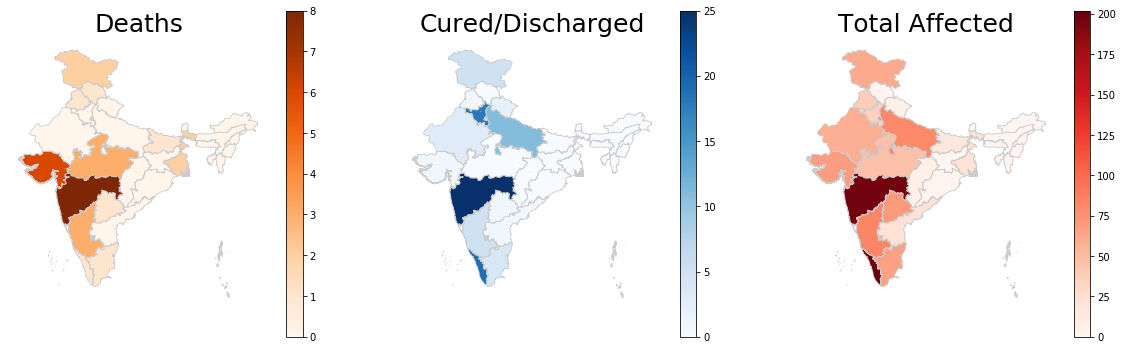

In [110]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))
t=0
for ax in axes: 
    if t==0:
        ax.axis('off')
        ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Deaths', cmap='Oranges', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=1
    elif t==1:
        ax.axis('off')
        ax.set_title('Cured/Discharged', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Cured', cmap='Blues', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        t=2
    elif t==2:
        ax.axis('off')
        ax.set_title('Total Affected', fontdict={'fontsize': '25', 'fontweight' : '3'})

        merged.plot(column='Total_cases', cmap='Reds', 
                    linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [111]:
#fig.savefig("statewise_affected.png", dpi=1000)

In [112]:
# fig, axes = plt.subplots(ncols=2, figsize=(15,6))
# t=0
# for ax in axes: 
#     if t==0:
#         ax.axis('off')
#         ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '3'})

#         merged.plot(column='Deaths', cmap='Oranges', 
#                     linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#         t=1
#     elif t==1:
#         ax.axis('off')
#         ax.set_title('Cured/Discharged', fontdict={'fontsize': '25', 'fontweight' : '3'})

#         merged.plot(column='Cured', cmap='Blues', 
#                     linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [113]:
#fig.savefig("death_cure.png", dpi=1000)

In [114]:
state_dic = {}
for state in states.index:
    state_dic[state] = covid[covid['State/UnionTerritory']==state].drop(['State/UnionTerritory'], axis=1).set_index('Date')

In [115]:
for state in state_dic:
    state_dic[state][['Total Active','Total_cases', 'Cured','Deaths']].iplot(title=state,
                    #colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    xTitle='first case -> today', yTitle='Confirmed cases')

### Category 1 states

Maharastra, Kerala and Karnataka

In [116]:
state_dic['Maharashtra'][['Total Active', 'Cured','Deaths']].iplot(title='Maharashtra',
                    #colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    xTitle='first case -> today', yTitle='Confirmed cases')

In [117]:
state_dic['Kerala'][['Total Active', 'Cured','Deaths']].iplot(title='Kerala',
                    #colors={'Total':'black', 'Safe-Zone':'blue'}, width=2.5
                    xTitle='first case -> today', yTitle='Confirmed cases')

### Kerala vs MH vs rest of India

In [118]:
kmh = covid[(covid['State/UnionTerritory'] == 'Kerala') | (covid['State/UnionTerritory'] == 'Maharashtra')]
rest = covid[(covid['State/UnionTerritory'] != 'Kerala') & (covid['State/UnionTerritory'] != 'Maharashtra')].groupby('Date').sum()
rest['State/UnionTerritory'] = 'Other States'
rest_india = pd.concat([kmh.set_index('Date'),rest])
rest_india = rest_india.sort_index()
rest_india.head()

,Cured,Deaths,State/UnionTerritory,Total_cases,Total Active
Date,,,,,
2020-01-30,0,0,Kerala,1,1
2020-01-31,0,0,Kerala,1,1
2020-02-01,0,0,Kerala,2,2
2020-02-02,0,0,Kerala,3,3
2020-02-03,0,0,Kerala,3,3


Text(0.5, 1.0, 'MH vs Kerala vs RestOfIndia')

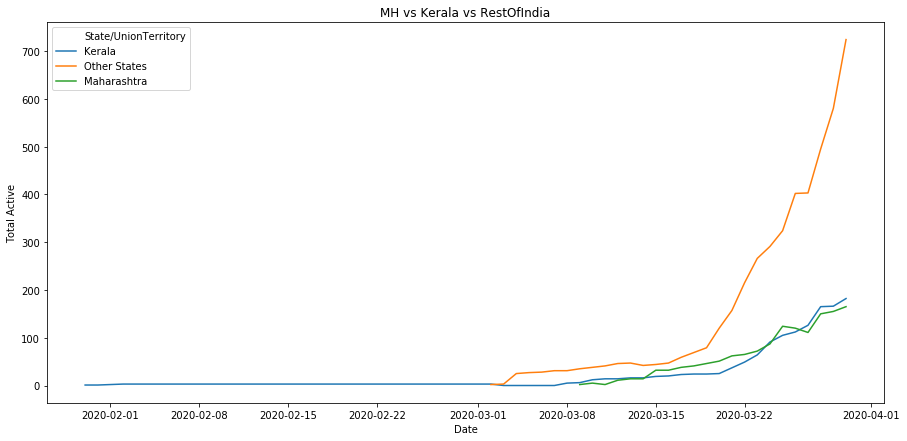

In [119]:
## Plot this with plotly

fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=rest_india, x=rest_india.index, y='Total Active', hue='State/UnionTerritory', 
             ax=ax)
ax.set_title('MH vs Kerala vs RestOfIndia')




### Kerala+MH vs Rest

In [120]:
km = kmh.groupby('Date').sum()
km['State/UnionTerritory'] = 'Kerala + Maharashtra'
rest_km = pd.concat([km,rest])
rest_km = rest_km.sort_index()
rest_km.head()

,Cured,Deaths,Total_cases,Total Active,State/UnionTerritory
Date,,,,,
2020-01-30,0,0,1,1,Kerala + Maharashtra
2020-01-31,0,0,1,1,Kerala + Maharashtra
2020-02-01,0,0,2,2,Kerala + Maharashtra
2020-02-02,0,0,3,3,Kerala + Maharashtra
2020-02-03,0,0,3,3,Kerala + Maharashtra


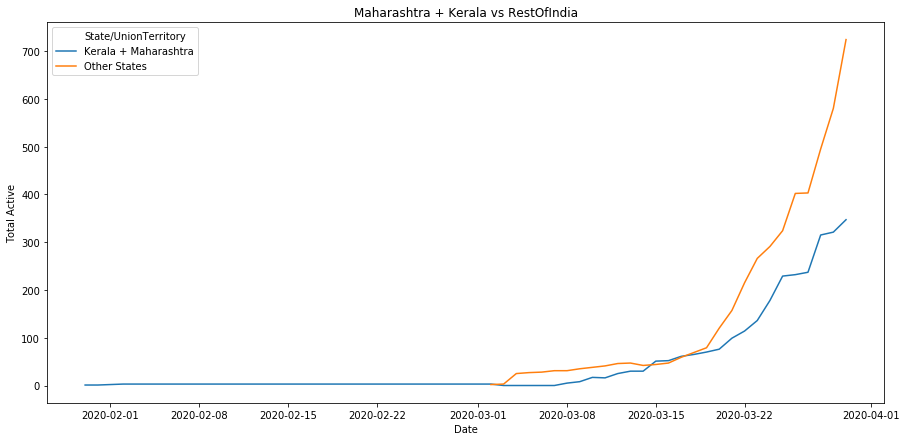

In [121]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=rest_km, x=rest_km.index, y='Total Active', hue='State/UnionTerritory',ax=ax, )
ax.set_title('Maharashtra + Kerala vs RestOfIndia')
fig.savefig("mhkerala_vs_india.png", dpi=1000)

### India at district level

Transforming pdf to csv

In [122]:
dist1 = pd.read_excel("DistrictWiseList.xlsx",sheet_name=0)
dist2 = pd.read_excel("DistrictWiseList.xlsx",sheet_name=1)
district = pd.concat([dist1,dist2])
district = district[:-2]

district = district[['District','No of Positive cases']]
district = district.set_index('District')
district

,No of Positive cases
District,
South Andaman,9
Chitoor,1
East Godavari,2
Guntur,2
Krishna,3
...,...
Kolkata,7
Nadia,5
North 24 Pargana,2


In [123]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp"
map_df = gpd.read_file(fp)
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


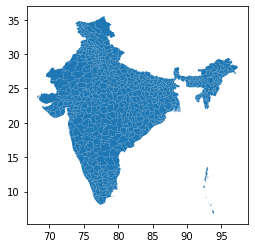

In [124]:
map_df = map_df[['NAME_1','NAME_2', 'geometry']]
map_df.plot()

In [125]:
merged = map_df.set_index('NAME_2').join(district)
merged['No of Positive cases'] = merged['No of Positive cases'].fillna(0)

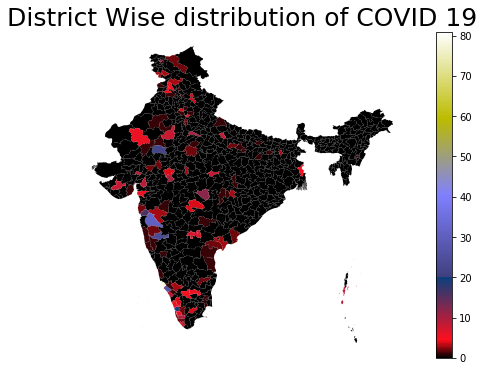

In [163]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('District Wise distribution of COVID 19', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure


merged.plot(column='No of Positive cases', cmap='gist_stern',ax=ax,legend=True)# linewidth=0.8, edgecolor='0.8', )
fig.savefig("india_dist.png", dpi=1000)
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
# ax.axis('off')

# world.plot(ax=ax, column='2015', scheme='quantiles')

# ax.margins(0)
# ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# plt.savefig('sample.png', bbox_inches="tight", pad_inches=0)

In [127]:
maharashtra = merged[merged['NAME_1'] == 'Maharashtra']
maharashtra

,NAME_1,geometry,No of Positive cases
Ahmadnagar,Maharashtra,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",3
Akola,Maharashtra,"POLYGON ((76.82024 20.28149, 76.81767 20.28176...",0
Amravati,Maharashtra,"POLYGON ((78.08906 21.18236, 78.09028 21.17835...",0
Aurangabad,Maharashtra,"POLYGON ((75.21554 19.55770, 75.20956 19.56258...",1
Bhandara,Maharashtra,"MULTIPOLYGON (((80.43332 21.09715, 80.42831 21...",0
Bid,Maharashtra,"POLYGON ((75.58914 18.69700, 75.59061 18.68763...",0
Buldana,Maharashtra,"POLYGON ((76.53200 19.85120, 76.53134 19.85667...",0
Chandrapur,Maharashtra,"POLYGON ((79.51482 19.54076, 79.51595 19.53681...",0
Dhule,Maharashtra,"POLYGON ((74.93796 20.92760, 74.93751 20.91903...",0
Garhchiroli,Maharashtra,"POLYGON ((80.26754 18.71797, 80.26037 18.71410...",0


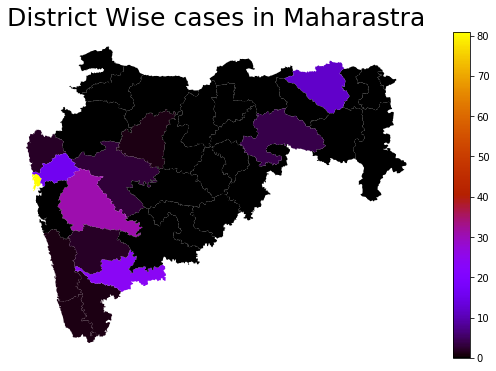

In [166]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('District Wise cases in Maharastra', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
maharashtra.plot(column='No of Positive cases', cmap='gnuplot', linewidth=0.8, ax=ax, legend=True)
fig.savefig("maharastra.png", dpi=1000)
#'gnuplot'

In [129]:
kerala = merged[merged['NAME_1'] == 'Kerala']
kerala

,NAME_1,geometry,No of Positive cases
Alappuzha,Kerala,"MULTIPOLYGON (((76.41431 9.56320, 76.41431 9.5...",2
Ernakulam,Kerala,"MULTIPOLYGON (((76.38239 9.82431, 76.38264 9.8...",19
Idukki,Kerala,"POLYGON ((77.38676 9.51674, 77.38640 9.50679, ...",2
Kannur,Kerala,"MULTIPOLYGON (((75.19403 12.11625, 75.19403 12...",27
Kasaragod,Kerala,"MULTIPOLYGON (((75.15764 12.10931, 75.15764 12...",78
Kollam,Kerala,"POLYGON ((76.76355 8.85163, 76.76506 8.84479, ...",2
Kottayam,Kerala,"MULTIPOLYGON (((76.46736 9.54097, 76.46736 9.5...",6
Kozhikode,Kerala,"MULTIPOLYGON (((75.81125 11.16181, 75.81125 11...",9
Malappuram,Kerala,"POLYGON ((76.06149 10.72085, 76.05975 10.71879...",0
Palakkad,Kerala,"POLYGON ((76.88830 10.79988, 76.89149 10.79216...",4


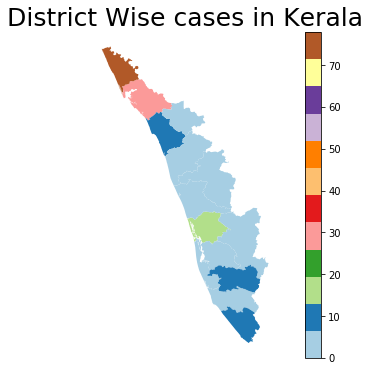

In [167]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('District Wise cases in Kerala', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
kerala.plot(column='No of Positive cases', cmap='Paired', linewidth=0.8, ax=ax, legend=True)
fig.savefig("kerala.png", dpi=1000)

### To predict death-cure rate for various states

In [131]:
# a-Time between first case to first cure.
# b-Time between the equal/greater no. of cases as compared to cures.
# d-First case to death

In [132]:
recovery = {}
for state in state_dic:
    
    start = state_dic[state].index[0]
    try:
        death = state_dic[state][state_dic[state]['Deaths']==1].index[0]
    except IndexError:
        death = start

    finally:
        death = (death-start).days

    try:
        cure_a = state_dic[state][state_dic[state]['Cured']>=1].index[0]
    except IndexError:
        cure_a = start

    finally:
        a = (cure_a-start).days

    try:
        cure_b = state_dic[state][state_dic[state]['Cured']>=3].index[0]
        st = state_dic[state][state_dic[state]['Total Active']>=3].index[0]
    except IndexError:
        cure_b = start
        st = start

    finally:
        b = (cure_b-st).days
    
    try:
        cure_c = state_dic[state][state_dic[state]['Cured']>=5].index[0]
        st = state_dic[state][state_dic[state]['Total Active']>=5].index[0]
    except IndexError:
        cure_c = start
        st = start

    finally:
        c = (cure_c-st).days
        
    try:
        cure_d = state_dic[state][state_dic[state]['Cured']>=7].index[0]
        st = state_dic[state][state_dic[state]['Total Active']>=7].index[0]
    except IndexError:
        cure_d = start
        st = start

    finally:
        d = (cure_d-st).days

    recovery[state] = [death,  a,b,c,d]

In [133]:
recov = pd.DataFrame(index=recovery, columns=['First death','1st Recovery','3nd Recovery','5th Recovery','7th Recovery'])
for st in recovery:
    recov.loc[st] = recovery[st]
recov

,First death,1st Recovery,3nd Recovery,5th Recovery,7th Recovery
Andhra Pradesh,0,13,0,0,0
Andaman and Nicobar Islands,0,0,0,0,0
Bihar,0,0,0,0,0
Chandigarh,0,0,0,0,0
Chhattisgarh,0,0,0,0,0
Delhi,12,12,13,9,0
Goa,0,0,0,0,0
Gujarat,2,9,0,0,0
Haryana,0,20,13,13,13
Himachal Pradesh,3,0,0,0,0


### India and the world

In [283]:
World = pd.read_html('https://www.bbc.com/news/world-51235105')
World = World[0]
World.columns = ['Country', 'Cases', 'Deaths']
World = World.set_index('Country')
World.head()

,Cases,Deaths
Country,,
USA,164371.0,3162.0
Italy,101739.0,11591.0
Spain,87956.0,7716.0
China,82240.0,3309.0
Germany,66885.0,645.0


In [284]:
World['Cases'] = World['Cases'].fillna(0)
World['Deaths'] = World['Deaths'].fillna(0)

In [285]:
# cc = pd.read_csv('country_codes')
# cc = cc[['COUNTRY','CODE']]
# cc.to_csv('country_codes.csv', index=False)
cc = pd.read_csv('country_codes.csv')
cc.head()

,COUNTRY,CODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [286]:
code = cc.set_index('COUNTRY')

In [287]:
world = World.join(code)

world.head()

,Cases,Deaths,CODE
Country,,,
USA,164371.0,3162.0,USA
Italy,101739.0,11591.0,ITA
Spain,87956.0,7716.0,ESP
China,82240.0,3309.0,CHN
Germany,66885.0,645.0,DEU


In [288]:
data = dict(
        type = 'choropleth',
        locations = world['CODE'],
        z = world['Cases'],
        text = world.index,
        colorscale= 'Portland',
        colorbar = {'title' : 'CASES'},
      ) 

In [289]:
layout = dict(
    title = 'COVID 19 CASES AROUND THE WORLD',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

In [290]:
import plotly.graph_objs as go 

In [291]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [ ]:
['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [292]:
data = dict(
        type = 'choropleth',
        locations = world['CODE'],
        z = world['Deaths'],
        text = world.index,
        colorscale= 'Portland',
        colorbar = {'title' : 'DEATHS'},
      ) 

layout = dict(
    title = 'COVID 19 DEATHS AROUND THE WORLD',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)